In [1]:
import tensorflow as tf
print(tf.__version__)


2.12.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Creating data to view and fit
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [3]:
# making lables
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [4]:
n = len(X)
n

50

In [5]:
# splitting the data into 80-20
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]


## Importing functions from my repo


In [6]:
!wget https://raw.githubusercontent.com/nikbhaladhare2104/TensorFlow-functions/TensorFlow/helper_functions_1.py

--2023-07-27 07:57:15--  https://raw.githubusercontent.com/nikbhaladhare2104/TensorFlow-functions/TensorFlow/helper_functions_1.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1586 (1.5K) [text/plain]
Saving to: ‘helper_functions_1.py’

helper_functions_1. 100%[===================>]   1.55K  --.-KB/s    in 0s      

2023-07-27 07:57:16 (23.8 MB/s) - ‘helper_functions_1.py’ saved [1586/1586]



In [7]:
from helper_functions_1 import visualise_data, plot_predictions, mae, mse

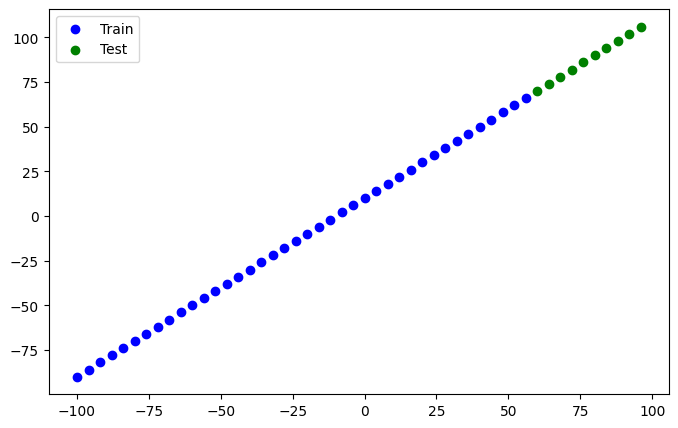

In [8]:
visualise_data(train_data = X_train,
                   train_labels = y_train,
                   test_data = X_test,
                   test_labels = y_test)

## Running experiments to improve a model


There are many different ways you can do this, but 3 of the main ones are:

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns).
2. Make your model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find the patterns in the data.

model_1 - 1 layer, trained for 100 epochs.


In [9]:
# set random seed
tf.random.set_seed(42)

# create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 18.3555 - mae: 18.3555
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 12.0251 - mae: 12.0251
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2674 - mae: 11.2674
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 9.5660 - mae: 9.5660
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.4761 - mae: 10.4761
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.7010 - mae: 9.7010
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.7961 - mae: 8.7961
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0593 - mae: 9.0593
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 19.3245 - mae: 19.3245
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.4299 - mae: 10.4299
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - 

1/1 [==============================] - 0s 123ms/step


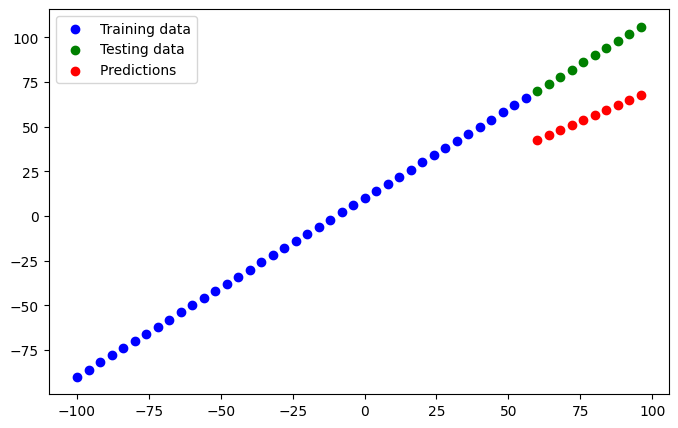

In [10]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)

plot_predictions(X_train, y_train, X_test, y_test, y_preds_1)

In [11]:
# calculate metrics of model_1
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(32.66018, 1079.1559)

Build model_2

This time we'll add an extra dense layer (so now our model will have 2 layers) whilst keeping everything else the same.

In [12]:
# set  random seed
tf.random.set_seed(42)

# create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output


In [13]:
# make and plot prediction on model_2
y_preds_2 = model_2.predict(X_test)

y_preds_2.shape, y_test.shape

1/1 [==============================] - 0s 101ms/step


((10, 1), (10,))

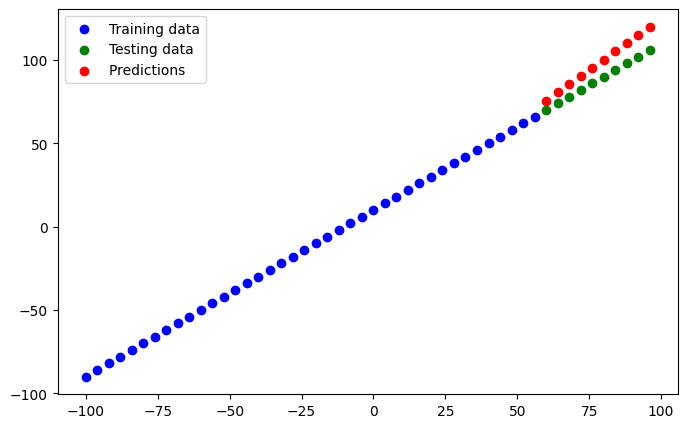

In [14]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds_2.squeeze())

In [15]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(9.834242, 103.838425)

Build model_3

For our 3rd model, we'll keep everything the same as model_2 except this time we'll train for longer (500 epochs instead of 100).

This will give our model more of a chance to learn the patterns in the data.

In [16]:
# set random seed
tf.random.set_seed(42)

# create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)


1/1 [==============================] - 0s 58ms/step


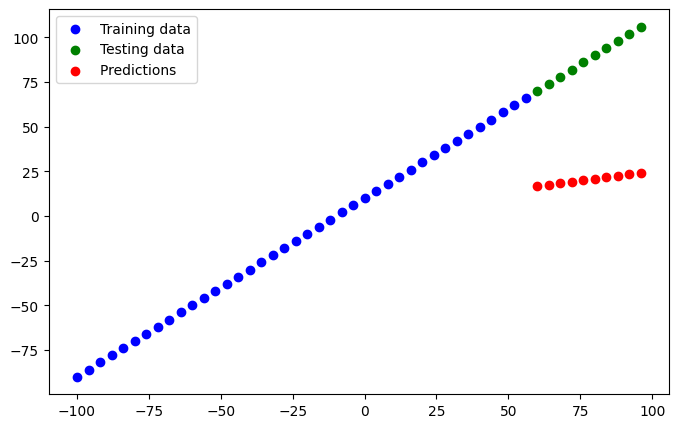

In [17]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, predictions=y_preds_3)

In [18]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(67.43269, 4630.193)

##Comparing results

In [19]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

In [21]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,32.660179,1079.155884
1,model_2,9.834242,103.838425
2,model_3,67.432693,67.432693


it looks like model_2 performed the best.

##Saving a model

You can save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

1. The SavedModel format (default).
2. The HDF5 format.

In [22]:
# Save a model using the SavedModel format
model_2.save('best_model_SavedModel_format')

In [23]:
# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls best_model_SavedModel_format


assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


Now let's save the model in the HDF5 format, we'll use the same method but with a different filename.



In [24]:
# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

In [25]:
# Check it out
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


##Loading a model

We can load a saved model using the load_model() method.

Loading a model for the different formats (SavedModel and HDF5) is the same (as long as the pathnames to the particular formats are correct).

In [26]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


Now let's test it out.



In [30]:
# Compare model_2 with the SavedModel version (should return True)
model_2_preds = model_2.predict(X_test)
loaded_saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, model_2_preds.squeeze()).numpy() == mae(y_test, loaded_saved_model_preds.squeeze()).numpy()

1/1 [==============================] - 0s 45ms/step


True

Loading in from the HDF5 is much the same.



In [32]:
# loading the model from HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compare model_2 with the loaded HDF5 version (should return True)
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, model_2_preds.squeeze()).numpy() == mae(y_test, h5_model_preds.squeeze()).numpy()

1/1 [==============================] - 0s 60ms/step


True

##Downloading a model (from Google Colab)

In [34]:
# Download the model (or any file) from Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>